In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats

In [2]:
dc_crime_data = pd.read_csv('dc_crime_add_vars.csv')
cluster_map = pd.read_csv('cluster_map.csv')

In [3]:
dc_crime_data.head()

,Unnamed: 0,X,REPORT_DAT,SHIFT,OFFENSE,METHOD,BLOCK,DISTRICT,PSA,WARD,...,year,month,day,hour,minute,second,EW,NS,quad,crimetype
0,1,1,8/31/2008 8:47:00 PM,EVENING,THEFT/OTHER,OTHERS,3500 - 3599 BLOCK OF R STREET NW,2.0,206.0,2,...,2008,8,31,20,47,0,West,North,Northwest,Non-Violent
1,2,2,9/1/2008 12:45:00 AM,MIDNIGHT,MOTOR VEHICLE THEFT,OTHERS,2000 - 2015 BLOCK OF O STREET NW,2.0,208.0,2,...,2008,9,1,0,45,0,West,North,Northwest,Non-Violent
2,3,3,9/1/2008 3:00:00 AM,MIDNIGHT,THEFT/OTHER,OTHERS,700 - 799 BLOCK OF 11TH STREET NW,1.0,101.0,2,...,2008,9,1,3,0,0,East,North,Northeast,Non-Violent
3,4,4,9/9/2008 7:46:00 AM,DAY,THEFT/OTHER,OTHERS,1700 - 1799 BLOCK OF P STREET NW,2.0,208.0,2,...,2008,9,9,7,46,0,West,North,Northwest,Non-Violent
4,5,5,8/24/2008 8:00:00 PM,EVENING,MOTOR VEHICLE THEFT,OTHERS,500 - 599 BLOCK OF INDIANA AVENUE NW,1.0,102.0,2,...,2008,8,24,20,0,0,East,North,Northeast,Non-Violent


In [4]:
dc_crime_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 342867 entries, 0 to 342866
Data columns (total 32 columns):
Unnamed: 0              342867 non-null int64
X                       342867 non-null int64
REPORT_DAT              342867 non-null object
SHIFT                   342867 non-null object
OFFENSE                 342867 non-null object
METHOD                  342867 non-null object
BLOCK                   342867 non-null object
DISTRICT                342667 non-null float64
PSA                     342616 non-null float64
WARD                    342867 non-null int64
ANC                     342867 non-null object
NEIGHBORHOOD_CLUSTER    338162 non-null object
BLOCK_GROUP             341776 non-null object
CENSUS_TRACT            341776 non-null float64
VOTING_PRECINCT         342783 non-null object
CCN                     342867 non-null int64
START_DATE              342854 non-null object
END_DATE                331216 non-null object
XBLOCK                  342867 non-null floa

In [5]:
cluster_map.head()

,NEIGHBORHOOD_CLUSTER,neighborhoods
0,0,unknown
1,1,"Kalorama Heights, Adams Morgan, Lanier Heights"
2,2,"Columbia Heights, Mt. Pleasant, Pleasant Plain..."
3,3,"Howard University, Le Droit Park, Cardozo/Shaw"
4,4,"Georgetown, Burleith/Hillandale"


In [6]:
pd.set_option('display.max_colwidth', -1)

In [7]:
cluster_map.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 2 columns):
NEIGHBORHOOD_CLUSTER    40 non-null int64
neighborhoods           40 non-null object
dtypes: int64(1), object(1)
memory usage: 720.0+ bytes


In [8]:
cluster_map.rename(columns={"NEIGHBORHOOD_CLUSTER": "cluster"}, inplace=True)

In [9]:
dc_crime_data.drop(columns=['Unnamed: 0','X','REPORT_DAT','START_DATE','END_DATE', 'minute','second', 'CCN','BLOCK','WARD','optional', 'ANC','BLOCK_GROUP','CENSUS_TRACT'], inplace = True)

In [10]:
dc_crime_data.rename(columns={"NEIGHBORHOOD_CLUSTER": "cluster"}, inplace=True)

In [11]:
dc_crime_data['cluster'].fillna(0, inplace=True)

In [12]:
dc_crime_data['cluster'] = dc_crime_data['cluster'].astype(str)

In [13]:
dc_crime_data['cluster'] = dc_crime_data['cluster'].apply(lambda cluster: cluster.replace("Cluster",""))

In [14]:
dc_crime_data['cluster'] = pd.to_numeric(dc_crime_data['cluster'])

In [15]:
dc_crime_data['count'] = 1
dc_crime_data['violent'] = 0
dc_crime_data['non_violent'] = 0

In [16]:
dc_crime_data.loc[dc_crime_data.crimetype == "Non-Violent", "non_violent"] = 1
dc_crime_data.loc[dc_crime_data.crimetype == "Violent", "violent"] = 1

In [17]:
# ----- end of data setup -----

In [18]:
dc_crime_data['OFFENSE'].value_counts()

THEFT/OTHER                   130435
THEFT F/AUTO                  85287 
ROBBERY                       35267 
MOTOR VEHICLE THEFT           33188 
BURGLARY                      31292 
ASSAULT W/DANGEROUS WEAPON    23436 
SEX ABUSE                     2402  
HOMICIDE                      1234  
ARSON                         326   
Name: OFFENSE, dtype: int64

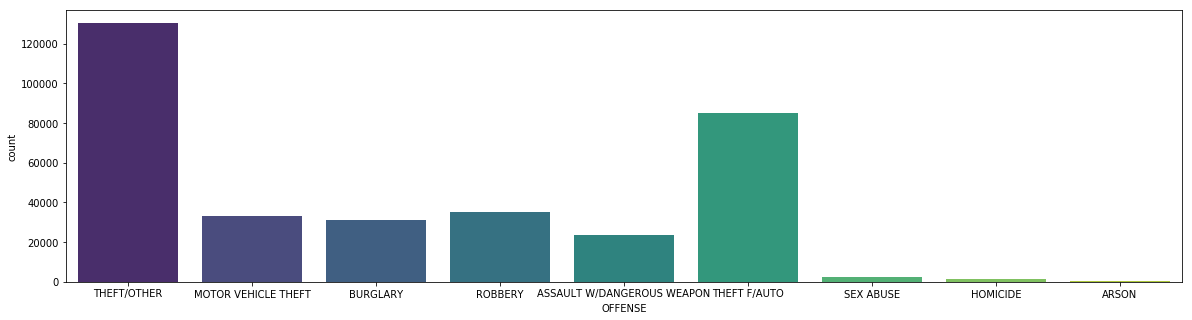

In [19]:
plt.figure(figsize=(20,5))
sns.countplot(x='OFFENSE',data=dc_crime_data,palette='viridis')

In [20]:
dc_crime_data['METHOD'].value_counts()

OTHERS    310658
GUN       20996 
KNIFE     11213 
Name: METHOD, dtype: int64

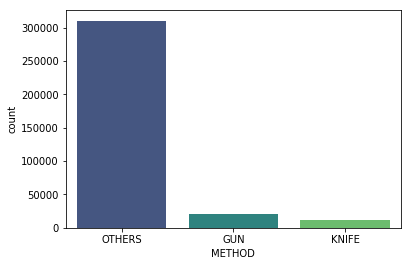

In [21]:
sns.countplot(x='METHOD',data=dc_crime_data,palette='viridis')

In [22]:
dc_crime_data['crimetype'].value_counts()

Non-Violent    280528
Violent        62339 
Name: crimetype, dtype: int64

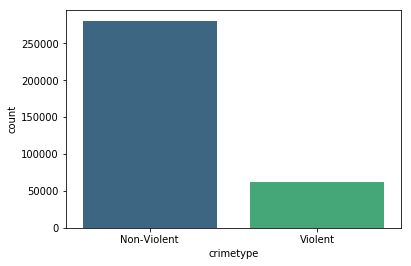

In [23]:
sns.countplot(x='crimetype',data=dc_crime_data,palette='viridis')

In [24]:
dc_crime_data['quad'].value_counts()

Northeast    194228
Southeast    81851 
Northwest    66773 
Southwest    15    
Name: quad, dtype: int64

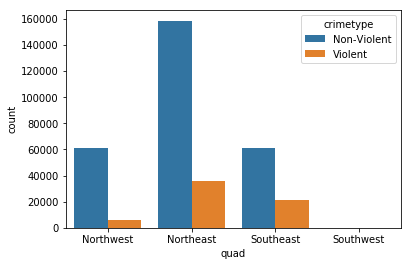

In [25]:
sns.countplot(x='quad',data=dc_crime_data, hue='crimetype')

In [26]:
quads = dc_crime_data.groupby(['quad']).agg({'violent':'sum', 'non_violent':'sum', 'count':'sum'})

In [27]:
quads['pct_violent'] = quads['violent'] / quads['count']

In [28]:
quads.sort_values(by=['pct_violent'], ascending=False)

,violent,non_violent,count,pct_violent
quad,,,,
Southeast,20988,60863,81851,0.256417
Northeast,35650,158578,194228,0.183547
Northwest,5700,61073,66773,0.085364
Southwest,1,14,15,0.066667


In [29]:
dc_crime_data['cluster'].nunique()

40

In [30]:
dc_crime_data['cluster'].value_counts().head(5)

2     28033
8     22584
6     19631
25    18736
18    16122
Name: cluster, dtype: int64

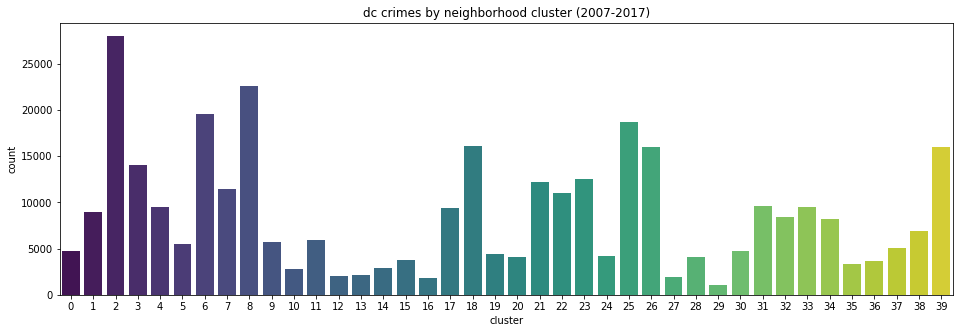

In [31]:
plt.figure(figsize=(16,5))
plt.title("dc crimes by neighborhood cluster (2007-2017)")
plt.xlabel('year')
plt.ylabel('crimes')
sns.countplot(x='cluster',data=dc_crime_data,palette='viridis')

In [32]:
cluster_map

,cluster,neighborhoods
0,0,unknown
1,1,"Kalorama Heights, Adams Morgan, Lanier Heights"
2,2,"Columbia Heights, Mt. Pleasant, Pleasant Plains, Park View"
3,3,"Howard University, Le Droit Park, Cardozo/Shaw"
4,4,"Georgetown, Burleith/Hillandale"
5,5,"West End, Foggy Bottom, GWU"
6,6,"Dupont Circle, Connecticut Avenue/K Street"
7,7,"Shaw, Logan Circle"
8,8,"Downtown, Chinatown, Penn Quarters, Mount Vernon Square, North Capitol Street"
9,9,"Southwest Employment Area, Southwest/Waterfront, Fort McNair, Buzzard Point"


In [33]:
# pd.merge(dc_crime_data, cluster_map, on='NEIGHBORHOOD_CLUSTER')

In [34]:
# dc_crime_data['hood'] = dc_crime_data['NEIGHBORHOOD_CLUSTER'].map(cluster_map)

In [35]:
# ----- start aggregates -----

In [36]:
# all dc crime by year

In [37]:
years = dc_crime_data.groupby(['year']).agg({'violent':'sum', 'non_violent':'sum', 'count':'sum'})

In [38]:
years['pct_violent'] = years['violent'] / years['count']

In [39]:
years.reset_index(inplace=True)

In [40]:
years

,year,violent,non_violent,count,pct_violent
0,2008,7397,26811,34208,0.216236
1,2009,6404,24806,31210,0.205191
2,2010,6303,25294,31597,0.199481
3,2011,6591,26983,33574,0.196313
4,2012,6953,28432,35385,0.196496
5,2013,6791,29128,35919,0.189064
6,2014,6169,32279,38448,0.160450
7,2015,6246,31070,37316,0.167381
8,2016,5721,31462,37183,0.153861
9,2017,3764,24263,28027,0.134299


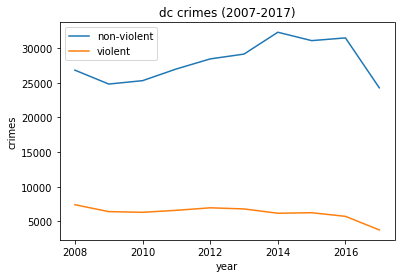

In [41]:
plt.plot(years['year'], years['non_violent'], label='non-violent')
plt.plot(years['year'], years['violent'], label='violent')

plt.xlabel('year')
plt.ylabel('crimes')

plt.title("dc crimes (2007-2017)")

plt.legend()

plt.show()

In [42]:
pd.to_datetime(dc_crime_data[dc_crime_data['year'] == 2017]['date']).sort_values(ascending=False)

189912   2017-11-03 00:26:42
139931   2017-11-02 23:43:34
341995   2017-11-02 23:28:47
38286    2017-11-02 23:09:39
251999   2017-11-02 23:03:53
189911   2017-11-02 22:57:54
251998   2017-11-02 22:52:11
236588   2017-11-02 22:46:49
80351    2017-11-02 22:45:38
277878   2017-11-02 22:36:39
99950    2017-11-02 22:36:04
139993   2017-11-02 22:18:01
209024   2017-11-02 22:09:31
99949    2017-11-02 21:40:34
236587   2017-11-02 21:34:15
189910   2017-11-02 21:29:19
277877   2017-11-02 21:29:18
341923   2017-11-02 21:22:31
209023   2017-11-02 21:19:42
209022   2017-11-02 21:14:28
209021   2017-11-02 21:03:11
251940   2017-11-02 21:02:54
139932   2017-11-02 20:48:49
341922   2017-11-02 20:43:53
189909   2017-11-02 20:37:39
61034    2017-11-02 20:31:15
99948    2017-11-02 20:27:24
139992   2017-11-02 20:21:23
341921   2017-11-02 20:16:13
236540   2017-11-02 20:10:55
                 ...        
339627   2017-01-01 11:20:07
206205   2017-01-01 11:04:46
186922   2017-01-01 10:57:07
186923   2017-

In [43]:
dc_crime_data.drop(dc_crime_data[dc_crime_data.year == 2017].index, inplace=True)
years.drop(years[years.year == 2017].index, inplace=True)

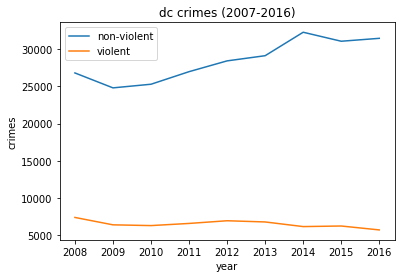

In [44]:
plt.plot(years['year'], years['non_violent'], label='non-violent')
plt.plot(years['year'], years['violent'], label='violent')

plt.xlabel('year')
plt.ylabel('crimes')

plt.title("dc crimes (2007-2016)")

plt.legend()

plt.show()

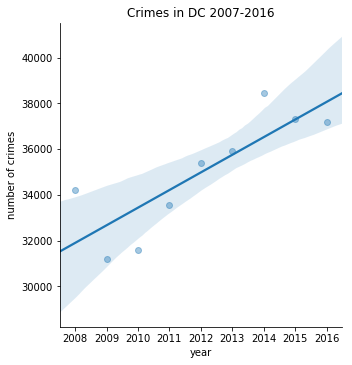

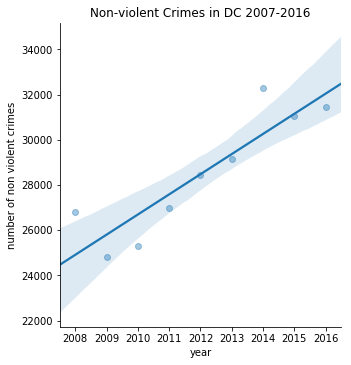

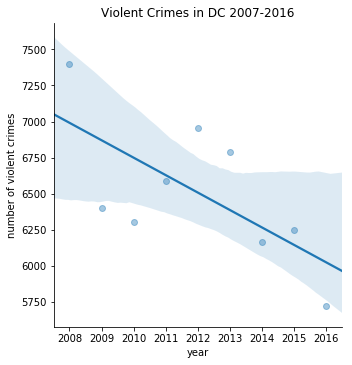

In [45]:
g = sns.lmplot(y='count', 
               x='year',
               data=years, # Data.
               fit_reg=True, # The regression line also includes a 95% confidence envelope.
               scatter_kws={'alpha':0.4})
g.set_ylabels("number of crimes")
g.set_xlabels("year")
plt.title('Crimes in DC 2007-2016')

g = sns.lmplot(y='non_violent', 
               x='year',
               data=years, # Data.
               fit_reg=True, # The regression line also includes a 95% confidence envelope.
               scatter_kws={'alpha':0.4})
g.set_ylabels("number of non violent crimes")
g.set_xlabels("year")
plt.title('Non-violent Crimes in DC 2007-2016')

g = sns.lmplot(y='violent', 
               x='year',
               data=years, # Data.
               fit_reg=True, # The regression line also includes a 95% confidence envelope.
               scatter_kws={'alpha':0.4})
g.set_ylabels("number of violent crimes")
g.set_xlabels("year")
plt.title('Violent Crimes in DC 2007-2016')
plt.show()

In [46]:
# each year for each neighborhood

In [47]:
neigh_year = dc_crime_data.groupby(['cluster', 'year']).agg({'violent':'sum', 'non_violent':'sum', 'count':'sum'})

In [48]:
neigh_year['pct_violent'] = neigh_year['violent'] / neigh_year['count']

In [49]:
neigh_year.reset_index(inplace=True)

In [50]:
neigh_year.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360 entries, 0 to 359
Data columns (total 6 columns):
cluster        360 non-null int64
year           360 non-null int64
violent        360 non-null int64
non_violent    360 non-null int64
count          360 non-null int64
pct_violent    360 non-null float64
dtypes: float64(1), int64(5)
memory usage: 17.0 KB


In [51]:
neigh_year.rename(columns={"NEIGHBORHOOD_CLUSTER": "cluster", "year": "year", "violent": "total_violent", "non_violent": "total_non_violent", "count": "total_count", "pct_violent": "pct_violent"}, inplace=True)

In [52]:
neigh_year

,cluster,year,total_violent,total_non_violent,total_count,pct_violent
0,0,2008,118,459,577,0.204506
1,0,2009,119,416,535,0.222430
2,0,2010,95,372,467,0.203426
3,0,2011,104,394,498,0.208835
4,0,2012,93,376,469,0.198294
5,0,2013,106,355,461,0.229935
6,0,2014,87,435,522,0.166667
7,0,2015,86,340,426,0.201878
8,0,2016,67,366,433,0.154734
9,1,2008,187,774,961,0.194589


In [53]:
# each neighborhood with averages over the years

In [54]:
neigh_year_avg = neigh_year.groupby(['cluster']).agg({'total_violent':'mean', 'total_non_violent':'mean', 'total_count':'mean'})

In [55]:
neigh_year_avg.reset_index(inplace=True)

In [56]:
neigh_year_avg['pct_violent'] = neigh_year_avg['total_violent'] / neigh_year_avg['total_non_violent']

In [57]:
neigh_year_avg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 5 columns):
cluster              40 non-null int64
total_violent        40 non-null float64
total_non_violent    40 non-null float64
total_count          40 non-null float64
pct_violent          40 non-null float64
dtypes: float64(4), int64(1)
memory usage: 1.6 KB


In [58]:
neigh_year_avg.rename(columns={"total_violent": "avg_violent", "total_non_violent": "avg_non_violent", "total_count": "avg_count", "pct_violent": "pct_violent"}, inplace=True)

In [59]:
neigh_year_avg.sort_values(by=['avg_count', 'avg_violent'], ascending=False)

,cluster,avg_violent,avg_non_violent,avg_count,pct_violent
2,2,536.777778,2332.666667,2869.444444,0.230113
8,8,280.222222,2013.666667,2293.888889,0.139160
6,6,190.333333,1836.777778,2027.111111,0.103623
25,25,312.222222,1587.666667,1899.888889,0.196655
18,18,388.888889,1270.444444,1659.333333,0.306105
39,39,533.444444,1121.333333,1654.777778,0.475723
26,26,211.777778,1427.777778,1639.555556,0.148327
3,3,221.777778,1199.666667,1421.444444,0.184866
23,23,322.111111,941.000000,1263.111111,0.342307
21,21,267.333333,982.222222,1249.555556,0.272172


In [60]:
# each neighborhood std over the years

In [61]:
#
# how can i combine the mean df and the std df into a single df?
#
# neigh_year_avg_std = neigh_year.groupby(['cluster']).agg({'total_violent':'mean', 'total_non_violent':'mean', 'total_violent':'std', 'total_non_violent':'std'})
#

In [62]:
neigh_year_std = neigh_year.groupby(['cluster']).agg({'total_violent':'std', 'total_non_violent':'std', 'total_count':'std'})

In [63]:
neigh_year_std.reset_index(inplace=True)

In [64]:
neigh_year_std.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 4 columns):
cluster              40 non-null int64
total_violent        40 non-null float64
total_non_violent    40 non-null float64
total_count          40 non-null float64
dtypes: float64(3), int64(1)
memory usage: 1.3 KB


In [65]:
neigh_year_std.rename(columns={"total_violent": "violent_std", "total_non_violent": "non_violent_std", "total_count": "count_std"}, inplace=True)

In [66]:
neigh_year_std.sort_values(by=['count_std', 'violent_std'], ascending=False)

,cluster,violent_std,non_violent_std,count_std
8,8,30.991038,415.966044,407.978383
2,2,102.715356,329.291284,261.141298
25,25,38.664511,232.453221,231.180365
3,3,46.649699,246.395515,219.418613
22,22,20.563587,201.685399,208.345733
26,26,28.309794,193.355746,193.283542
39,39,59.712040,146.441114,184.287668
17,17,23.629666,187.240561,175.714336
7,7,25.198104,194.849586,172.136896
21,21,18.553975,152.146129,146.960123


In [67]:
# ----- look at the top clusters -----

In [68]:
# top 5 neighborhood clusters with most average total crimes over the years

In [69]:
neigh_year_avg.sort_values(by=['avg_count'], ascending=False).head(5)

,cluster,avg_violent,avg_non_violent,avg_count,pct_violent
2,2,536.777778,2332.666667,2869.444444,0.230113
8,8,280.222222,2013.666667,2293.888889,0.139160
6,6,190.333333,1836.777778,2027.111111,0.103623
25,25,312.222222,1587.666667,1899.888889,0.196655
18,18,388.888889,1270.444444,1659.333333,0.306105


In [70]:
# 
# create graph here
# use these top 5 from neigh_year_avg
# but graph the data from neigh_year
#

In [71]:
# top 5 neighborhood clusters with most violent crimes over the years

In [72]:
neigh_year_avg.sort_values(by=['avg_violent'], ascending=False).head(5)

,cluster,avg_violent,avg_non_violent,avg_count,pct_violent
2,2,536.777778,2332.666667,2869.444444,0.230113
39,39,533.444444,1121.333333,1654.777778,0.475723
18,18,388.888889,1270.444444,1659.333333,0.306105
23,23,322.111111,941.000000,1263.111111,0.342307
25,25,312.222222,1587.666667,1899.888889,0.196655


In [73]:
# 
# create graph here
# use these top 5 from neigh_year_avg
# but graph the data from neigh_year
#

In [74]:
# top 5 neighborhood clusters with highest percentage violent crimes over the years

In [75]:
neigh_year_avg.sort_values(by=['pct_violent'], ascending=False).head(5)

,cluster,avg_violent,avg_non_violent,avg_count,pct_violent
36,36,136.222222,243.222222,379.444444,0.560073
37,37,177.000000,341.333333,518.333333,0.518555
29,29,37.000000,74.000000,111.000000,0.500000
38,38,230.444444,483.555556,714.000000,0.476563
39,39,533.444444,1121.333333,1654.777778,0.475723


In [76]:
# 
# create graph here
# use these top 5 from neigh_year_avg
# but graph the data from neigh_year
#

In [77]:
# *****************************************************************************
#
# i determine the top 5 clusters from the neigh_year_std dataframe
# then i want to graph those 5 clusters  using data from a different dataframe
# i am hard-coding those values to acomplish this
# what's a better way to do this?
#
# *****************************************************************************

In [78]:
# top 5 neighborhood clusters with largest std of average crimes over the years

In [79]:
neigh_year_std.sort_values(by=['count_std'], ascending=False).head(5)

,cluster,violent_std,non_violent_std,count_std
8,8,30.991038,415.966044,407.978383
2,2,102.715356,329.291284,261.141298
25,25,38.664511,232.453221,231.180365
3,3,46.649699,246.395515,219.418613
22,22,20.563587,201.685399,208.345733


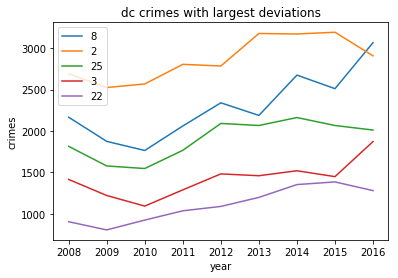

In [81]:
plt.plot(neigh_year[neigh_year['cluster'] == 8]['year'], neigh_year[neigh_year['cluster'] == 8]['total_count'], label='8')
plt.plot(neigh_year[neigh_year['cluster'] == 2]['year'], neigh_year[neigh_year['cluster'] == 2]['total_count'], label='2')
plt.plot(neigh_year[neigh_year['cluster'] == 25]['year'], neigh_year[neigh_year['cluster'] == 25]['total_count'], label='25')
plt.plot(neigh_year[neigh_year['cluster'] == 3]['year'], neigh_year[neigh_year['cluster'] == 3]['total_count'], label='3')
plt.plot(neigh_year[neigh_year['cluster'] == 22]['year'], neigh_year[neigh_year['cluster'] == 22]['total_count'], label='22')


plt.xlabel('year')
plt.ylabel('crimes')

plt.title("dc crimes with largest deviations")

plt.legend()

plt.show()

In [82]:
# top 5 neighborhood clusters with smallest std of average crimes over the years

In [83]:
neigh_year_std.sort_values(by=['count_std'], ascending=True).head(5)

,cluster,violent_std,non_violent_std,count_std
16,16,5.904330,24.427330,22.616366
29,29,14.195070,17.832555,23.446748
12,12,3.689324,26.680725,26.794485
28,28,19.668785,36.155912,35.409901
14,14,4.415880,35.243597,35.790284


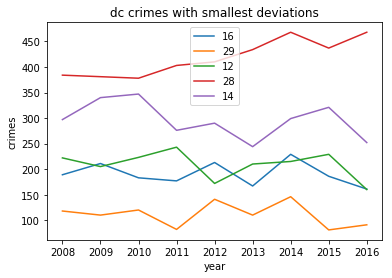

In [84]:
plt.plot(neigh_year[neigh_year['cluster'] == 16]['year'], neigh_year[neigh_year['cluster'] == 16]['total_count'], label='16')
plt.plot(neigh_year[neigh_year['cluster'] == 29]['year'], neigh_year[neigh_year['cluster'] == 29]['total_count'], label='29')
plt.plot(neigh_year[neigh_year['cluster'] == 12]['year'], neigh_year[neigh_year['cluster'] == 12]['total_count'], label='12')
plt.plot(neigh_year[neigh_year['cluster'] == 28]['year'], neigh_year[neigh_year['cluster'] == 28]['total_count'], label='28')
plt.plot(neigh_year[neigh_year['cluster'] == 14]['year'], neigh_year[neigh_year['cluster'] == 14]['total_count'], label='14')


plt.xlabel('year')
plt.ylabel('crimes')

plt.title("dc crimes with smallest deviations")

plt.legend()

plt.show()